In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [26]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return numpy.array(X), numpy.array(Y)

In [27]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df = read_csv('airline-passengers.csv', usecols=[1])
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [28]:
data = df.values
print(data)
data = data.astype('float32')

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]
 [104]
 [118]
 [115]
 [126]
 [141]
 [135]
 [125]
 [149]
 [170]
 [170]
 [158]
 [133]
 [114]
 [140]
 [145]
 [150]
 [178]
 [163]
 [172]
 [178]
 [199]
 [199]
 [184]
 [162]
 [146]
 [166]
 [171]
 [180]
 [193]
 [181]
 [183]
 [218]
 [230]
 [242]
 [209]
 [191]
 [172]
 [194]
 [196]
 [196]
 [236]
 [235]
 [229]
 [243]
 [264]
 [272]
 [237]
 [211]
 [180]
 [201]
 [204]
 [188]
 [235]
 [227]
 [234]
 [264]
 [302]
 [293]
 [259]
 [229]
 [203]
 [229]
 [242]
 [233]
 [267]
 [269]
 [270]
 [315]
 [364]
 [347]
 [312]
 [274]
 [237]
 [278]
 [284]
 [277]
 [317]
 [313]
 [318]
 [374]
 [413]
 [405]
 [355]
 [306]
 [271]
 [306]
 [315]
 [301]
 [356]
 [348]
 [355]
 [422]
 [465]
 [467]
 [404]
 [347]
 [305]
 [336]
 [340]
 [318]
 [362]
 [348]
 [363]
 [435]
 [491]
 [505]
 [404]
 [359]
 [310]
 [337]
 [360]
 [342]
 [406]
 [396]
 [420]
 [472]
 [548]
 [559]
 [463]
 [407]
 [362]
 [405]
 [417]
 [391]
 [419]
 [461]
 [472]
 [535]
 [622]
 [606]
 [508]
 [461]
 [390]

In [29]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
# split into train and test sets
training_size = int(len(data) * 0.67)
testing_size = len(data) - training_size
train, test = data[0:training_size,:], data[training_size:len(data),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainY))

94


In [30]:
print(len(testY))

46


In [31]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

W0527 17:48:01.831764 4468479424 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/100
 - 1s - loss: 0.0409
Epoch 2/100
 - 0s - loss: 0.0197
Epoch 3/100
 - 0s - loss: 0.0142
Epoch 4/100
 - 0s - loss: 0.0127
Epoch 5/100
 - 0s - loss: 0.0117
Epoch 6/100
 - 0s - loss: 0.0106
Epoch 7/100
 - 0s - loss: 0.0097
Epoch 8/100
 - 0s - loss: 0.0087
Epoch 9/100
 - 0s - loss: 0.0076
Epoch 10/100
 - 0s - loss: 0.0065
Epoch 11/100
 - 0s - loss: 0.0057
Epoch 12/100
 - 0s - loss: 0.0048
Epoch 13/100
 - 0s - loss: 0.0041
Epoch 14/100
 - 0s - loss: 0.0035
Epoch 15/100
 - 0s - loss: 0.0030
Epoch 16/100
 - 0s - loss: 0.0027
Epoch 17/100
 - 0s - loss: 0.0025
Epoch 18/100
 - 0s - loss: 0.0023
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [35]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

Train Score: 22.93 RMSE
Test Score: 47.60 RMSE


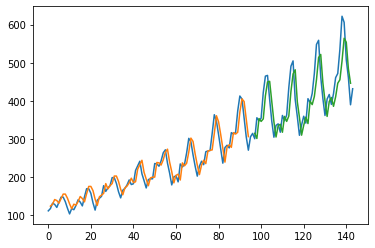

In [37]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()